<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai1(Trang1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (Lập	 trình)	 Sử	 dụng Decision	 Tree,	 Naïve	 Bayes,	 K	 Nearest	 Neighbors,	Neural	Network	để	xây	dựng	mô	hình	phân	lớp	trên bộ	dữ	liệu	Iris	từ	thư	viện	sklearn:

Mô	tả	bộ	dữ	liệu	Iris:	Bộ dữ liệu	Iris	bao	gồm	thông	tin	về 3	loài	hoa	Iris	khác	nhau:	Iris	setosa,	Iris	versicolor	và	Iris	virginica.	Gồm 4	thuộc	tính	đo	lường (đơn	vị	cm):	Chiều	dài	của	lá	đài	(sepal	length);	Chiều	rộng	của	lá	đài	(sepal	width);	Chiều	dài	của	cánh	hoa	(petal	length);	Chiều	rộng	của	cánh	hoa	(petal	width).

Bộ dữ liệu Iris	thường	được	sử dụng	để thực	hiện	các	tác	vụ phân	loại	và	nhận	dạng	loài	hoa	dựa	trên	các	thuộc	tính	đã	nêu	trên.

a) Đọc	bộ	dữ	liệu	Iris	từ	sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

%matplotlib inline

In [3]:
iris = load_iris()
data = iris.data
target = iris.target
print("Nguyễn Thành Luân - 6351071043")
print("Đã tải dữ liệu Iris thành công.")

Nguyễn Thành Luân - 6351071043
Đã tải dữ liệu Iris thành công.


b) Khảo	sát	bộ	dữ	liệu	Iris	với	yêu	cầu	sau:
- In	ra	tên	các	thuộc	tính,	thuộc	tính	phân	lớp.
Hướng	dẫn:	Sử	dụng	feature_names,	target_names
- In	ra	số	lượng	mẫu,	số	lượng	thuộc	tính
Hướng	dẫn:	Sử	dụng	data.shape,	target.shape
- In	ra	5	mẫu	dữ	liệu	đầu	tiên
Hướng	dẫn:	Sử	dụng	data[],	target[]
- Thống	kê	count,	mean,	std,	min,	max,	tứ	vị	phân	của	bộ	dữ	liệu
Hướng	dẫn:	tạo	dataframe	và	sử	dụng	describe

In [7]:
print("Nguyễn Thành Luân - 6351071043")
print("Tên các thuộc tính (Features):", iris.feature_names)
print("Tên các lớp (Target names):", iris.target_names)

print("\nNguyễn Thành Luân - 6351071043")
print(f"Kích thước dữ liệu (Data shape): {data.shape}")
print(f"Kích thước nhãn (Target shape): {target.shape}")

print("\nNguyễn Thành Luân - 6351071043")
print("5 mẫu dữ liệu đầu tiên:\n", data[:5])
print("5 nhãn đầu tiên:\n", target[:5])

df_iris = pd.DataFrame(data, columns=iris.feature_names)
print("\nNguyễn Thành Luân - 6351071043")
df_iris.describe()

Nguyễn Thành Luân - 6351071043
Tên các thuộc tính (Features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tên các lớp (Target names): ['setosa' 'versicolor' 'virginica']

Nguyễn Thành Luân - 6351071043
Kích thước dữ liệu (Data shape): (150, 4)
Kích thước nhãn (Target shape): (150,)

Nguyễn Thành Luân - 6351071043
5 mẫu dữ liệu đầu tiên:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
5 nhãn đầu tiên:
 [0 0 0 0 0]

Nguyễn Thành Luân - 6351071043


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


c) Chuẩn	hóa	dữ liệu data về	đoạn	[0,1]

Hướng	dẫn:	Gán	X	là	data	và	Y	là	target	của	bộ	dữ	liệu.	Chia	mỗi	giá	trị của	X	cho
giá	trị lớn	nhất	trong	cột	tương	ứng.	Sử	dụng	max	để	lấy	giá	trị	lớn	nhất	của
data.

In [8]:
max_values = data.max(axis=0)

X = data / max_values
Y = target

print("Nguyễn Thành Luân - 6351071043")
print("\nGiá trị max của từng cột:", max_values)
print("\n5 mẫu dữ liệu sau khi chuẩn hóa:\n", X[:5])

Nguyễn Thành Luân - 6351071043

Giá trị max của từng cột: [7.9 4.4 6.9 2.5]

5 mẫu dữ liệu sau khi chuẩn hóa:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]


d) Chia	dữ liệu	thành	tập	train và	tập	test	theo	tỷ	lệ	8:2

Hướng	 dẫn:	 Sử	 dụng	 train_test_split từ	 thư	 viện	 sklearn	 để	 chia	 X,	 Y	 thành
X_train,	X_test,	y_train,	y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Nguyễn Thành Luân - 6351071043")
print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Nguyễn Thành Luân - 6351071043
Kích thước tập Train: (120, 4)
Kích thước tập Test: (30, 4)


e) Sử	dụng	Cây	quyết	định	để	phân	lớp	và	thực	hiện	các	yêu	cầu	sau:
- Huấn	luyện	mô	hình	phân	lớp	trên	tập	train
Hướng	dẫn:		sử	dụng	DecisionTreeClassifier của	thư	viện	sklearn
- Dự	đoán	nhãn	lớp	cho	tập	test

  Hướng	dẫn:	sử	dụng	predict
- Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test

  Hướng	dẫn:	sử	dụng	accuracy_score	từ	thư	viện	sklearn	để	tính	accuracy	giữa	y
dự	đoán	từ	mô	hình	và	y_test
- Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	mô	hình
trên	tập	test

  Hướng	dẫn: sử	dụng	classification_report	từ	thư	viện	sklearn	để	tính	các	độ	đo
trên	giữa	y	dự	đoán	từ	mô	hình	và	y_test
- Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)

  Hướng	dẫn:	sử	dụng	confusion_matrix	từ	thư	viện	sklearn	để	tính	các	độ	đo	trên
giữa	y	dự	đoán	từ	mô	hình	và	y_test.	Sử	dụng	heatmap	của	seaborn	và	matplotlib
để	vẽ	bản	đồ.

Nguyễn Thành Luân - 6351071043
Accuracy: 1.0000

Nguyễn Thành Luân - 6351071043
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Nguyễn Thành Luân - 6351071043


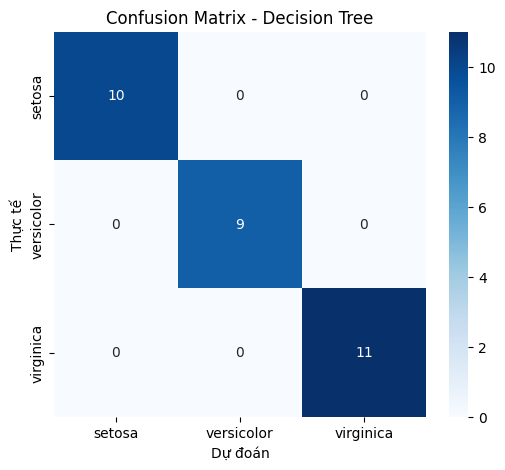

In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {acc_dt:.4f}")

print("\nNguyễn Thành Luân - 6351071043")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

print("\nNguyễn Thành Luân - 6351071043")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

f) Sử	dụng	Naïve	Bayes	để	phân	lớp	và	thực	hiện	các	yêu	cầu	như	câu	e.

Hướng	dẫn:	sử	dụng	GaussianNB	của	thư	viện	sklearn


Nguyễn Thành Luân - 6351071043
Accuracy: 1.0000

Nguyễn Thành Luân - 6351071043
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Nguyễn Thành Luân - 6351071043


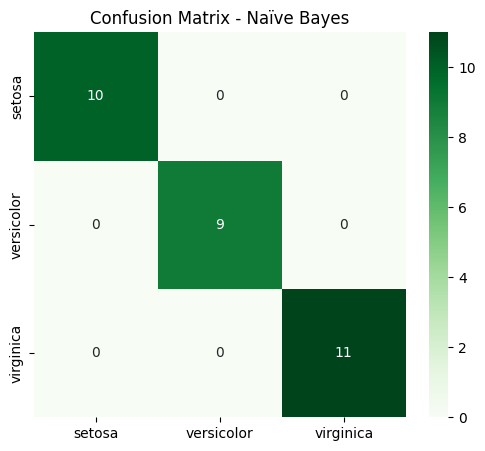

In [11]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("\nNguyễn Thành Luân - 6351071043")
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {acc_nb:.4f}")

print("\nNguyễn Thành Luân - 6351071043")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))

print("\nNguyễn Thành Luân - 6351071043")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

g) Sử	dụng	K Nearest Neighbors	Classizier để	phân	lớp	và	thực	hiện	các	yêu
cầu	như	câu	e.

Hướng	dẫn:	sử	dụng	KNeighborsClassigier của	thư	viện	sklearn


Nguyễn Thành Luân - 6351071043
Accuracy: 1.0000

Nguyễn Thành Luân - 6351071043
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Nguyễn Thành Luân - 6351071043


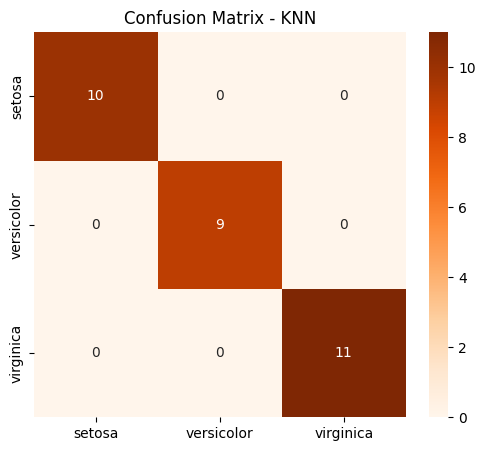

In [12]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("\nNguyễn Thành Luân - 6351071043")
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {acc_knn:.4f}")

print("\nNguyễn Thành Luân - 6351071043")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

print("\nNguyễn Thành Luân - 6351071043")
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - KNN')
plt.show()

h) Sử	dụng	Neural	Network	để	phân	lớp	và	thực	hiện	các	yêu	cầu:
- Xây	dựng	Neural	Network	gồm	02	hidden layers và	01	output layer:
  - 01	 hidden layer:	 Gồm	10 neuron,	 sử	 dụng	 hàm	 kích	 hoạt	Relu	và	 các	neuron	được	kết	nối	đầy	đủ	(Fully	connected),	với	input_shape	là	shape	của	tập	X_train (4	thuộc	tính).
  - 01	 hidden	layer:	 Gồm	20 neuron,	 sử	 dụng	 hàm	 kích	 hoạt	Relu	 và	 các	neuron	 được	 kết	 nối	 đầy	 đủ	 với	 các	 neuron	 ở	 lớp	 trước	 đó (Fully	connected)
  - Output layer:	Gồm	số	lượng	neuron	là	số	class	cần	phân	lớp,	sử	dụng
hàm	 kích	 hoạt	Softmax	 để	 tính	xác	 suất	 của	 từng	 class	 và	 các	neuron	được	kết	nối	đầy	đủ	(Fully	connected).

  Hướng	 dẫn:	 Sử	 dụng	 Sequential	 và	 Dense	 từ	 thư	 viện	 Keras	 với TensorFlow	backend.
  Sequential	là	một	loại	mô	hình	mạng	phổ	biến	trong	Keras,	cho	phép	xây	dựng	một	chuỗi	tuần	tự	các	layer mạng	nơ-ron.
  Dense:	là	một	fully	connected	layer	trong	mạng.	Các	đơn	vị	trong	layer này	kết	nối	tất	cả	các	đơn	vị	từ	layer trước	đó	đến	tất	cả	các	đơn	vị	của	layer hiện	tại.
- Biên	dịch	mô	hình	với	 tối	ưu	hóa	adam	để	điều	chỉnh	các	 trọng	số;	sử	dụng
sparse_categorical_crossentropy	loss để	đo	lường	sự	khác	biệt	giữa	dự	đoán	và nhãn	thực	tế	trong	quá	trình	train;	sử	dụng	accuracy	để	đánh	giá	hiệu	suất	của	mô	hình	sau	mỗi	lần	lặp	huấn	luyện.
  
  Hướng	dẫn:	Sử	dụng	compile
- Huấn	luyện	mô	hình	dựa	trên	tập	train	(X_train,	y_train)	với	số	vòng	lặp	(epoch)	là	100;	số	lượng	mẫu	dữ	liệu	được	sử	dụng	 trong	mỗi	lần	cập	nhật	 trọng	số	(batch_size)	 là	 1.	 Hiển	 thị	 thông	 tin	 tiến	 trình	 huấn	 luyện	 sau	 mỗi	 epoch	(verbose	=	1)

  Hướng	dẫn:	Sử	dụng	fit
- Dự	đoán	nhãn	lớp	cho	tập	test
Hướng	dẫn:	sử	dụng	predict	để	dự	đoán	xác	suất	cho	mỗi	mẫu	và	mỗi	class.	Sử	dụng	argmax	của	thư	viện	numpy	để	chọn	ra	class	có	xác	suất	lớn	nhất	của	từng	mẫu	dữ	liệu.
- Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
- Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	mô	hình	trên	tập	test
- Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)

  Hướng	dẫn:	Thực	hiện	tương	tư	như	câu	e


Nguyễn Thành Luân - 6351071043
Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3228 - loss: 1.1477
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.9896
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.8684
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.7349
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.5596
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9444 - loss: 0.4885
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9664 - loss: 0.3837
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.3280
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9184 - loss: 0.2968
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.3047
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.2602
Epoch 12/

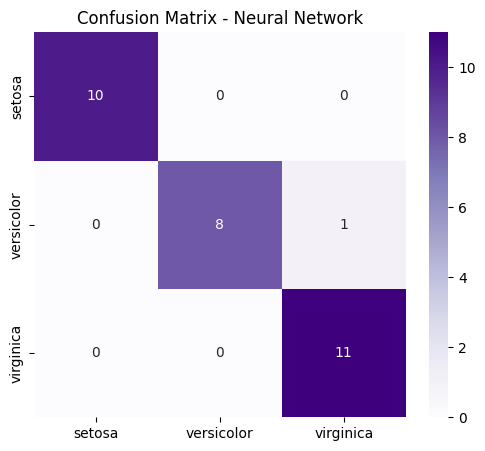

In [13]:

model = Sequential()

model.add(Input(shape=(4,)))
model.add(Dense(10, activation='relu'))

model.add(Dense(20, activation='relu'))

model.add(Dense(3, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


print("\nNguyễn Thành Luân - 6351071043")
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)


y_pred_prob = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_prob, axis=1)

print("\nNguyễn Thành Luân - 6351071043")
acc_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {acc_nn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn, target_names=iris.target_names))

print("\nNguyễn Thành Luân - 6351071043")
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Neural Network')
plt.show()

i) Sử	dụng	các	mô	hình	phân	lớp	đã	huấn	luyện	ở	trên	(câu	e,	f,	g,h)	cho	03	mẫu	dữ	liệu	mới	sau:

  [6.2,	2.9,	4.3,	1.3]

  [5.1,	3.5,	1.4,	0.2]
  
  [7.3,	2.8,	6.4,	2.1]

Hướng	dẫn: Đưa	3	mẫu	dữ	liệu	trên	vào	array.	Sử	dụng	predict	để	dự	đoán	từ	các	mô	hình	phân	lớp	đã	huấn	luyện	ở	các	câu	trên.	In	ra	nhãn	lớp	dự	đoán.

In [14]:
new_samples = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

new_samples_norm = new_samples / max_values

print("\nNguyễn Thành Luân - 6351071043")
print("Dữ liệu mới sau chuẩn hóa:\n", new_samples_norm)

print("\n--- KẾT QUẢ DỰ ĐOÁN ---")
models = {
    "Decision Tree": dt_model,
    "Naïve Bayes": nb_model,
    "KNN": knn_model
}

for name, mod in models.items():
    pred = mod.predict(new_samples_norm)
    pred_names = [iris.target_names[p] for p in pred]
    print(f"{name}: {pred} -> {pred_names}")

pred_nn_prob = model.predict(new_samples_norm)
pred_nn = np.argmax(pred_nn_prob, axis=1)
pred_nn_names = [iris.target_names[p] for p in pred_nn]
print(f"Neural Network: {pred_nn} -> {pred_nn_names}")


Nguyễn Thành Luân - 6351071043
Dữ liệu mới sau chuẩn hóa:
 [[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]

--- KẾT QUẢ DỰ ĐOÁN ---
Decision Tree: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
Naïve Bayes: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
KNN: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Neural Network: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]


j) Nhận	xét,	đánh	giá	hiệu	suất	của	các	mô	hình	đã	huấn	luyện

In [15]:
print("\nNguyễn Thành Luân - 6351071043")
print("--- NHẬN XÉT ---")
print(f"Accuracy Decision Tree: {acc_dt:.4f}")
print(f"Accuracy Naïve Bayes:   {acc_nb:.4f}")
print(f"Accuracy KNN:           {acc_knn:.4f}")
print(f"Accuracy Neural Net:    {acc_nn:.4f}")

print("\nNhận xét:")
print("- Các mô hình đều cho độ chính xác cao (thường > 90%) do bộ dữ liệu Iris khá đơn giản và rõ ràng.")
print("- Neural Network cấu hình 2 lớp ẩn hoạt động tốt nhưng tốn thời gian huấn luyện hơn so với các thuật toán cổ điển như NB hay KNN trên tập dữ liệu nhỏ này.")
print("- Cần lưu ý bước chuẩn hóa dữ liệu đầu vào cho các mẫu mới để đảm bảo dự đoán chính xác.")


Nguyễn Thành Luân - 6351071043
--- NHẬN XÉT ---
Accuracy Decision Tree: 1.0000
Accuracy Naïve Bayes:   1.0000
Accuracy KNN:           1.0000
Accuracy Neural Net:    0.9667

Nhận xét:
- Các mô hình đều cho độ chính xác cao (thường > 90%) do bộ dữ liệu Iris khá đơn giản và rõ ràng.
- Neural Network cấu hình 2 lớp ẩn hoạt động tốt nhưng tốn thời gian huấn luyện hơn so với các thuật toán cổ điển như NB hay KNN trên tập dữ liệu nhỏ này.
- Cần lưu ý bước chuẩn hóa dữ liệu đầu vào cho các mẫu mới để đảm bảo dự đoán chính xác.
